# Budapest Weather 2000-2020 analysis

#### Data Source: 
https://darksky.net/dev



#### Data Description: 
https://darksky.net/dev/docs  
Data is in SI units as follows:

* summary: Any summaries containing temperature or snow accumulation units will have their values in degrees
  Celsius or in centimeters (respectively).
* nearestStormDistance: Kilometers.
* precipIntensity: Millimeters per hour.
* precipIntensityMax: Millimeters per hour.
* temperature: Degrees Celsius.
* temperatureMin: Degrees Celsius.
* temperatureMax: Degrees Celsius.
* apparentTemperature: Degrees Celsius.
* dewPoint: Degrees Celsius.
* windSpeed: Meters per second.
* windGust: Meters per second.
* pressure: Hectopascals.
* visibility: Kilometers.

In [1]:
import glob
import time
from datetime import datetime
from pathlib import Path

import numpy as np
import pandas as pd
import os

In [2]:
IN_DIR = Path("/home/xunguist/Budapest_idojaras_2010-2020/BP_years")

## Read and parse raw data

#### Create custom parsers and define datetime columns

In [3]:
def custom_date_parser(x: str) -> datetime:
    ""
    try:
        x = datetime.strptime(x, "%Y-%m-%d %H:%M")
        return x
    except TypeError:
        return np.NaN
    
def custom_int_parser(x: str) -> int:
    ""
    try:
        x = np.int64(x)
        return x
    except (TypeError,ValueError):
        return np.NaN

datetime_cols = ["time", "sunriseTime", "temperatureLowTime",
                 "precipIntensityMaxTime", "temperatureHighTime",
                 "apparentTemperatureHighTime", "apparentTemperatureLowTime",
                 "temperatureMinTime", "temperatureMaxTime",
                 "apparentTemperatureMinTime", "apparentTemperatureMaxTime"]

####  Iterate over INDIR and collect data into a single pd dataframe

In [4]:
all_years = pd.DataFrame()

for file in IN_DIR.glob("*.csv"):
    year_df = pd.read_csv(file, 
                          parse_dates=datetime_cols,
                          date_parser=custom_date_parser,
                          converters={"uvIndex":custom_int_parser})
    all_years = all_years.append(year_df)

In [5]:
all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7669 entries, 0 to 365
Data columns (total 37 columns):
Unnamed: 0                     7669 non-null int64
time                           7669 non-null datetime64[ns]
summary                        7420 non-null object
sunriseTime                    7669 non-null datetime64[ns]
moonPhase                      7669 non-null float64
precipIntensity                5089 non-null float64
precipIntensityMax             5089 non-null float64
precipIntensityMaxTime         1870 non-null datetime64[ns]
precipProbability              5088 non-null float64
precipType                     3721 non-null object
temperatureHigh                7664 non-null float64
temperatureHighTime            7664 non-null datetime64[ns]
temperatureLow                 7666 non-null float64
temperatureHigh.1              7664 non-null float64
temperatureLowTime             7666 non-null datetime64[ns]
apparentTemperatureHigh        7664 non-null float64
apparentTempera

####  Rename, cast, drop and reindex

In [6]:
all_years.rename({"time":"date"}, 
                 axis=1, 
                 inplace=True)
all_years.loc[:,"date"] = pd.to_datetime(all_years["date"])
all_years.loc[:,"sunriseTime"] = pd.to_datetime(all_years["sunriseTime"])
all_years.loc[:,"temperatureHighTime"] = pd.to_datetime(all_years["temperatureHighTime"])
all_years.loc[:,"temperatureLowTime"] = pd.to_datetime(all_years["temperatureLowTime"])

all_years.loc[:,"year"] = all_years["date"].dt.year
all_years.loc[:,"month"] = all_years["date"].dt.month
all_years.loc[:,"day"] = all_years["date"].dt.day
all_years.loc[:,"dayofweek"] = all_years["date"].dt.dayofweek

all_years.drop(["Unnamed: 0", "temperatureHigh.1"], 
               axis=1, 
               inplace=True)

all_years.index = all_years["date"].dt.strftime("%Y-%m-%d")

In [7]:
all_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7669 entries, 2000-01-01 to 2020-12-31
Data columns (total 39 columns):
date                           7669 non-null datetime64[ns]
summary                        7420 non-null object
sunriseTime                    7669 non-null datetime64[ns]
moonPhase                      7669 non-null float64
precipIntensity                5089 non-null float64
precipIntensityMax             5089 non-null float64
precipIntensityMaxTime         1870 non-null datetime64[ns]
precipProbability              5088 non-null float64
precipType                     3721 non-null object
temperatureHigh                7664 non-null float64
temperatureHighTime            7664 non-null datetime64[ns]
temperatureLow                 7666 non-null float64
temperatureLowTime             7666 non-null datetime64[ns]
apparentTemperatureHigh        7664 non-null float64
apparentTemperatureHighTime    7664 non-null datetime64[ns]
apparentTemperatureLowTime     7666 non-null dat

#### Check for missing data 

In [8]:
null_df = pd.DataFrame(all_years.isnull().sum(), columns=["null count"])
null_df["null %"] = round(null_df["null count"] / len(all_years)*100, 2)
null_df.sort_values(by="null count", ascending=False)

,null count,null %
ozone,7056,92.01
precipIntensityMaxTime,5799,75.62
precipType,3948,51.48
visibility,2887,37.65
precipProbability,2581,33.65
precipIntensity,2580,33.64
precipIntensityMax,2580,33.64
windGust,2407,31.39
pressure,356,4.64
summary,249,3.25


#### Drop columns where above 50% is missing

In [9]:
all_years.drop(['precipType', 'ozone','precipIntensityMaxTime'], 
               axis=1,
               inplace=True)

### Extreme Weather

#### Highest Temperature max

In [10]:
all_years[all_years["temperatureMax"] == all_years["temperatureMax"].max()][["temperatureMax"]]

,temperatureMax
date,
2007-07-20,40.44


In [11]:
temperatureMax_mean = all_years["temperatureMax"].mean()
f"mean: {temperatureMax_mean:.2f}"

'mean: 16.39'

#### Lowest Temperature low

In [12]:
all_years[all_years["temperatureMin"] == all_years["temperatureMin"].min()][["temperatureMin"]]

,temperatureMin
date,
2003-01-13,-20.61


In [13]:
temperatureMin_mean = round(all_years["temperatureMin"].mean(), 1)
f"mean: {temperatureMin_mean:.2f}"

'mean: 7.20'

#### Highest windSpeed (m/s)

In [14]:
all_years[all_years["windSpeed"] == all_years["windSpeed"].max()][["windSpeed"]]

,windSpeed
date,
2018-10-24,9.66


In [15]:
windSpeed_mean = round(all_years["windSpeed"].mean(), 1)
f"mean: {windSpeed_mean:.2f}"

'mean: 2.30'

## Plotting data

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


### Comparing same periods of different years

In [17]:
all_years["month_day"] = all_years["date"].dt.month.astype(str) \
+ "." + all_years["date"].dt.day.astype(str)

In [18]:
year1 = '2015'
year2 = '2020'

start_period = '06-01'
end_period = '08-31'

year_1_df = all_years[f'{year1}-{start_period}': f'{year1}-{end_period}'].copy()
year_2_df = all_years[f'{year2}-{start_period}': f'{year2}-{end_period}'].copy()

In [19]:
year1_th_null_values = year_1_df["temperatureHigh"].isnull().sum()
year1_th_null_values = year_2_df["temperatureHigh"].isnull().sum()
print(f"{year1} count of null values: {year1_th_null_values}")
print(f"{year2} count of null values: {year1_th_null_values}")

2015 count of null values: 0
2020 count of null values: 0


### Comparing Temperature Highs

In [20]:
year_1_temp_high_mean = year_1_df["temperatureHigh"].mean()
year_2_temp_high_mean = year_2_df["temperatureHigh"].mean()

print(f"{year1} summer temperatureHigh mean: {year_1_temp_high_mean:.2f} C")
print(f"{year2} summer temperatureHigh mean: {year_2_temp_high_mean:.2f} C")

2015 summer temperatureHigh mean: 28.83 C
2020 summer temperatureHigh mean: 27.83 C


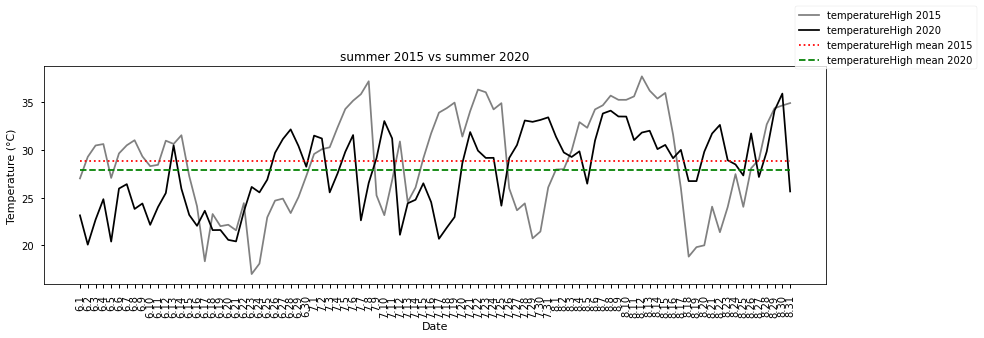

In [21]:
fig = plt.figure(figsize=(14,4))
ax = plt.axes()
ax.plot(year_1_df["month_day"],
        year_1_df["temperatureHigh"], 
         '-', 
         color='grey',
         label=f'temperatureHigh {year1}'
        )
ax.plot(year_2_df["month_day"],
        year_2_df["temperatureHigh"], 
         '-', 
         color='black',
         label=f'temperatureHigh {year2}'
        )

ax.plot([year_1_temp_high_mean] * len(year_1_df),
        ":",
        color='red',
        label=f'temperatureHigh mean {year1}'
       )

ax.plot([year_2_temp_high_mean] * len(year_2_df),
        "--",
        color='green',
        label=f'temperatureHigh mean {year2}'
       )

ax.tick_params(axis='x', rotation=90)

ax.set(title=f"summer {year1} vs summer {year2}",
       xlabel='Date', 
       ylabel='Temperature (°C)')


ax.legend(bbox_to_anchor=(1.2, 1.3))

### Comparing Temperature Lows

In [22]:
year1_tl_null_values = year_1_df["temperatureLow"].isnull().sum()
year2_tl_null_values = year_2_df["temperatureLow"].isnull().sum()
print(f"{year1} count of null values: {year1_tl_null_values}")
print(f"{year2} count of null values: {year2_tl_null_values}")

2015 count of null values: 0
2020 count of null values: 0


In [23]:
year_1_temp_low_mean = year_1_df["temperatureLow"].mean()
year_2_temp_low_mean = year_2_df["temperatureLow"].mean()

print(f"{year1} summer temperatureLow mean: {year_1_temp_low_mean:.2f} C")
print(f"{year2} summer temperatureLow mean: {year_2_temp_low_mean:.2f} C")

2015 summer temperatureLow mean: 16.99 C
2020 summer temperatureLow mean: 18.27 C


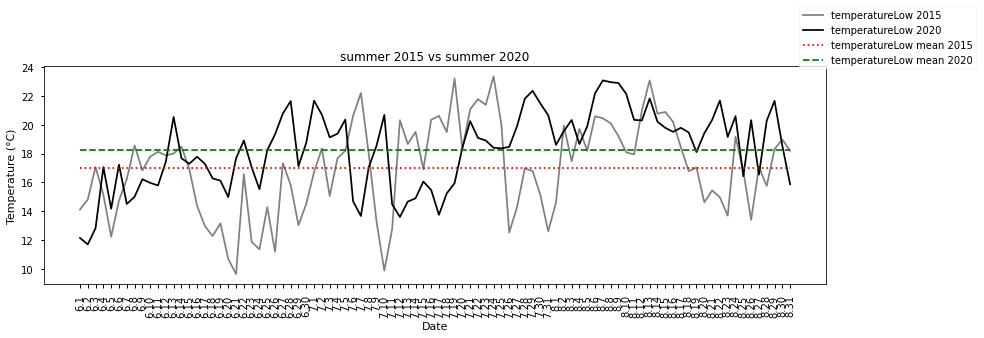

In [24]:
fig = plt.figure(figsize=(14,4))
ax = plt.axes()
ax.plot(year_1_df["month_day"],
        year_1_df["temperatureLow"], 
         '-', 
         color='grey',
         label=f'temperatureLow {year1}'
        )
ax.plot(year_2_df["month_day"],
        year_2_df["temperatureLow"], 
         '-', 
         color='black',
         label=f'temperatureLow {year2}'
        )

ax.plot([year_1_temp_low_mean] * len(year_1_df),
        ":",
        color='red',
        label=f'temperatureLow mean {year1}'
       )

ax.plot([year_2_temp_low_mean] * len(year_2_df),
        "--",
        color='green',
        label=f'temperatureLow mean {year2}'
       )

ax.tick_params(axis='x', rotation=90)

ax.set(title=f"summer {year1} vs summer {year2}",
       xlabel='Date', 
       ylabel='Temperature (°C)')


ax.legend(bbox_to_anchor=(1.2, 1.3))

### Comparing precipIntensity

precipIntensity measure unit: Millimeters per hour

In [25]:
all_years["precipIntensity"].describe()

count    5089.000000
mean        0.060715
std         0.395774
min         0.000000
25%         0.000000
50%         0.000000
75%         0.008300
max        11.334000
Name: precipIntensity, dtype: float64

In [26]:
year1_pi_null_values = year_1_df["precipIntensity"].isnull().sum()
year2_pi_null_values = year_2_df["precipIntensity"].isnull().sum()
print(f"{year1} count of null values: {year1_tl_null_values}")
print(f"{year2} count of null values: {year2_tl_null_values}")

2015 count of null values: 0
2020 count of null values: 0


In [27]:
year_1_precipIntensity_mean = year_1_df["precipIntensity"].mean()
year_2_precipIntensity_mean = year_2_df["precipIntensity"].mean()

print(f"{year1} summer precipIntensity mean: {year_1_precipIntensity_mean:.2f} Millimeters per hour")
print(f"{year2} summer precipIntensity mean: {year_2_precipIntensity_mean:.2f} Millimeters per hour")

2015 summer precipIntensity mean: 0.03 Millimeters per hour
2020 summer precipIntensity mean: 0.10 Millimeters per hour


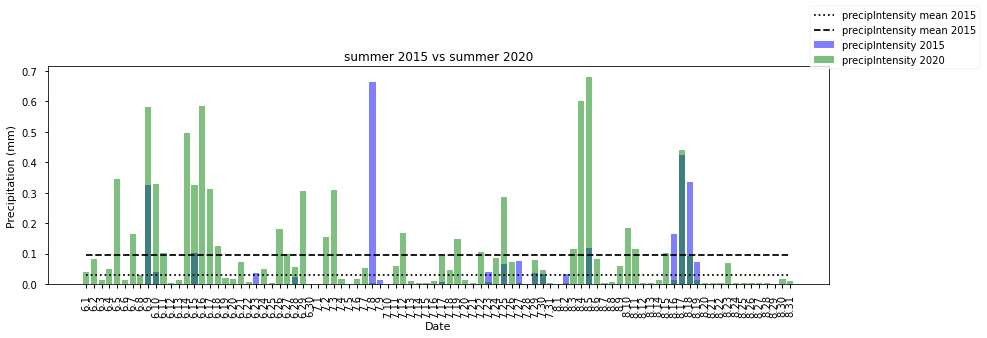

In [28]:
fig = plt.figure(figsize=(14,4))
ax = plt.axes()
ax.bar(year_1_df["month_day"], 
       year_1_df["precipIntensity"],
       color='blue',
       label=f'precipIntensity {year1}',
       alpha=0.5
       )

ax.bar(year_2_df["month_day"], 
       year_2_df["precipIntensity"],
       color='green',
       label=f'precipIntensity {year2}',
       alpha=0.5
       )

ax.plot([year_1_precipIntensity_mean] * len(year_1_df),
        ":",
        color='black',
        label=f'precipIntensity mean {year1}'
       )

ax.plot([year_2_precipIntensity_mean] * len(year_2_df),
        "--",
        color='black',
        label=f'precipIntensity mean {year1}'
       )

ax.tick_params(axis='x',rotation=90)

ax.set(title=f"summer {year1} vs summer {year2}",
       xlabel='Date', 
       ylabel='Precipitation (mm)')

ax.legend(bbox_to_anchor=(1.2, 1.3))

### Plotting Range

In [29]:
year_1_df = all_years[f'{year1}-{start_period}': f'{year1}-{end_period}'].copy()
year_2_df = all_years[f'{year2}-{start_period}': f'{year2}-{end_period}'].copy()

In [30]:
year_1_df["temp_range"] = year_1_df["temperatureHigh"] - year_1_df["temperatureLow"]

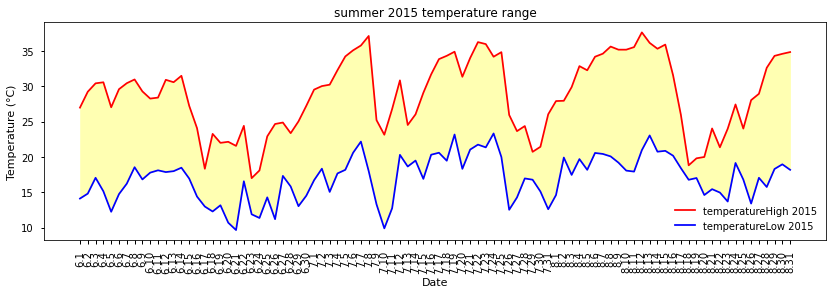

In [31]:
fig = plt.figure(figsize=(14,4))
ax = plt.axes()

ax.plot(year_1_df["month_day"],
        year_1_df["temperatureHigh"], 
         '-', 
         color='red',
         label=f'temperatureHigh {year1}'
        )

ax.plot(year_1_df["month_day"],
        year_1_df["temperatureLow"], 
         '-', 
         color='blue',
         label=f'temperatureLow {year1}'
        )

plt.fill_between(year_1_df["month_day"],
                 year_1_df["temperatureHigh"],
                 year_1_df["temperatureLow"], 
                 color="yellow",
                 alpha=0.3)

ax.tick_params(axis='x', rotation=90)

ax.set(title=f"summer {year1} temperature range",
       xlabel='Date', 
       ylabel='Temperature (°C)')


ax.legend(loc='lower right', frameon=False)

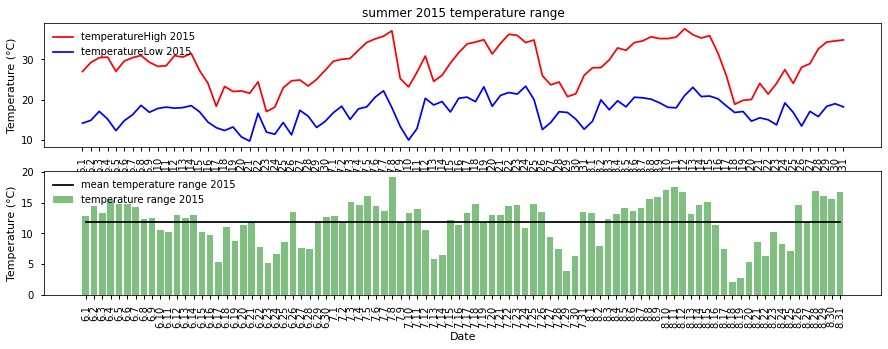

In [32]:
plt.style.use('seaborn-notebook')

fig, ax = plt.subplots(2,figsize=(15,5))

ax[0].plot(year_1_df["month_day"],
        year_1_df["temperatureHigh"], 
         '-', 
         color='red',
         label=f'temperatureHigh {year1}'
        )

ax[0].plot(year_1_df["month_day"],
        year_1_df["temperatureLow"], 
         '-', 
         color='blue',
         label=f'temperatureLow {year1}'
        )

ax[1].bar(year_1_df["month_day"], 
       year_1_df["temp_range"],
       color='green',
       label=f'temperature range {year1}',
       alpha=0.5
       )

ax[1].plot(year_1_df["month_day"],
           [year_1_df["temp_range"].mean()] * len(year_1_df), 
           '-', 
           color='black',
           label=f'mean temperature range {year1}'
          )

ax[0].tick_params(axis='x', rotation=90)

ax[0].set(title=f"summer {year1} temperature range",
       xlabel='Date', 
       ylabel='Temperature (°C)')


ax[1].tick_params(axis='x', rotation=90)
ax[1].set(xlabel='Date', ylabel='Temperature (°C)')


ax[0].legend(loc='upper left', frameon=False)
ax[1].legend(loc='upper left', frameon=False)

## [Climograph](https://en.wikipedia.org/wiki/Climograph)

A climograph is a graphical representation of a location's basic climate.  
Climographs display data for two variables:   
(a) monthly average temperature and  
(b) monthly average precipitation.  
These are useful tools to quickly describe a location's climate.   

Expected values: https://hu.wikipedia.org/wiki/Budapest  
Original Source: https://www.met.hu/  

In [33]:
plt.style.use('seaborn-white')

(0.0, 150.0)

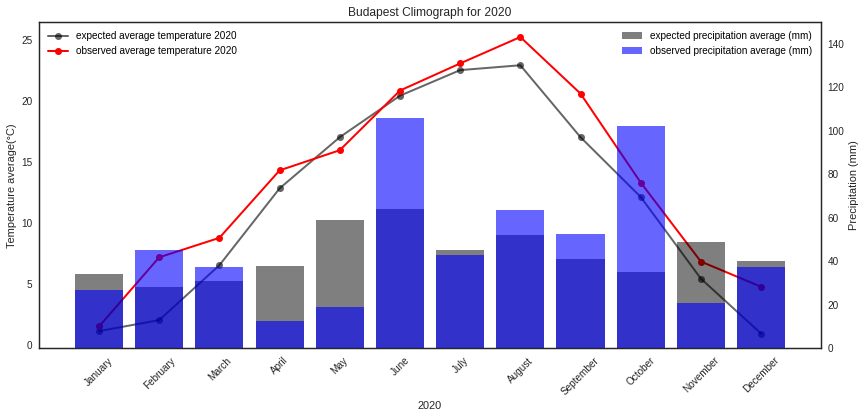

In [38]:
year_df = all_years["2020-01-01":"2020-12-31"].copy()

year_df.loc[:,"month_name"] = year_df.loc[:,"date"].dt.month_name()
year_average = year_df.groupby("month").mean()[["temperatureHigh","temperatureLow"]]
year_average.loc[:,"temp_average"] = (year_average.loc[:,"temperatureHigh"] \
                                      + year_average.loc[:,"temperatureLow"]) / 2
year_sum = year_df.groupby("month").sum()[["precipIntensity"]]
year_average.index = year_df["month_name"].unique()
year_sum.index = year_df["month_name"].unique()

fig = plt.figure(figsize=(14,6))
fig.patch.set_alpha(0)
ax = plt.axes()

ax.plot(year_sum.index,
        [1.1,2.0,6.5,12.8,17.0,20.4,22.5,22.9,17.0,12.1,5.4,0.9], 
         '-o', 
        color='black',
        label=f'expected average temperature {year_df.loc[:,"date"].dt.year[0]}',
        linewidth=2,
        alpha=0.6
        )

ax.plot(year_average["temp_average"], 
         '-o', 
        color='red',
        label=f'observed average temperature {year_df.loc[:,"date"].dt.year[0]}',
        linewidth=2,
        alpha=1
        )

ax2=ax.twinx()
ax2.set_ylabel('Precipitation (mm)')


ax2.bar(year_sum.index, 
       [34, 28, 31, 38, 59, 64, 45, 52, 41, 35, 49, 40],
       color='black',
       label=f'expected precipitation average (mm)',
       alpha=0.5
       )

ax2.bar(year_sum.index, 
       year_sum["precipIntensity"]*24,
       color='blue',
       label=f'observed precipitation average (mm)',
        alpha=0.6
       )

ax.tick_params(axis='x', rotation=45)

ax.set_xlabel(f'{year_df.loc[:,"date"].dt.year[0]}')
ax.set_ylabel('Temperature average(°C)')
ax.set_title(f'Budapest Climograph for {year_df.loc[:,"date"].dt.year[0]}')

l1 = ax.legend(loc='upper left', frameon=False)
l2 = ax2.legend(loc='upper right', frameon=False)

plt.setp(l1.get_texts(), color='black')
plt.setp(l2.get_texts(), color='black')

ax.grid(False)
ax2.grid(False)

plt.ylim(0, 150)

In [35]:
year_average

,temperatureHigh,temperatureLow,temp_average
January,4.255806,-1.297097,1.479355
February,10.994483,3.305517,7.150000
March,13.470000,4.021935,8.745968
April,20.085333,8.468333,14.276833
May,20.594194,11.270968,15.932581
June,24.877333,16.768333,20.822833
July,28.099032,17.997097,23.048065
August,30.425161,20.005161,25.215161
September,25.926333,15.222333,20.574333
October,17.046452,9.516129,13.281290
